Imports and Initial Setup

In [2]:
# Import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder
from scipy import stats

# Configure the display options
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")

# Load the data
data = pd.read_csv('../../src/data/creditcard.csv')

In [3]:
# Separate instances of each class
class_0 = data[data['Class'] == 0]
class_1 = data[data['Class'] == 1]

# Print the count of each class
print("Count of class 0:", len(class_0))
print("Count of class 1:", len(class_1))

Count of class 0: 284315
Count of class 1: 492


1. See the Size, Head, and Descriptions of the Data 

    Load the data and explore its size, head, and basic descriptions.

In [4]:
# Check the size of the data
print("Size of the data:")
print(data.shape)

# Display the first few rows of the data
print("\nHead of the data:")
data.head()

Size of the data:
(284807, 31)

Head of the data:


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
# Display the basic statistical descriptions of the data
print("\nDescription of the data:")
data.describe()


Description of the data:


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,2.239053e-15,1.673327e-15,-1.247012e-15,8.190001e-16,1.207294e-15,4.887456e-15,1.437716e-15,-3.772171e-16,9.564149e-16,1.039917e-15,6.406204e-16,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


2. Handle Missing Values

In [6]:
# Check for missing values
print("\nMissing values in each column:")
data.isnull().sum()


Missing values in each column:


Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

3. Data Cleaning

Check for Duplicates and White Spaces

In [8]:
# Check for duplicates
duplicates = data.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# Check for white spaces in column names
whitespace_columns = [col for col in data.columns if col.strip() != col]
if whitespace_columns:
    print(f"Columns with leading or trailing white spaces: {whitespace_columns}")
else:
    print("No columns with leading or trailing white spaces")

# Check for white spaces in the data
whitespace_data = data.applymap(lambda x: isinstance(x, str) and (x != x.strip())).sum().sum()
if whitespace_data > 0:
    print(f"Number of cells with leading or trailing white spaces: {whitespace_data}")
else:
    print("No cells with leading or trailing white spaces")

Number of duplicate rows: 1081
No columns with leading or trailing white spaces


C:\Users\Abeni\AppData\Local\Temp\ipykernel_1644\3734408516.py:13: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  whitespace_data = data.applymap(lambda x: isinstance(x, str) and (x != x.strip())).sum().sum()


No cells with leading or trailing white spaces


Remove duplicates

In [9]:
# Remove duplicates
data = data.drop_duplicates()

# Display the cleaned dataset
print("Cleaned dataset:")
data.head()

Cleaned dataset:


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [10]:
data.shape

(283726, 31)

Check and Correct Data Types

In [11]:
# Display the data types of each column
print("Data types before correction:")
print(data.dtypes)

Data types before correction:
Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object


Correct data types if needed

In [12]:
# Correct data types if needed
data['Time'] = data['Time'].astype('float64')
data['Amount'] = data['Amount'].astype('float64')
data['Class'] = data['Class'].astype('int64')

# Ensure all V columns are float64
for col in data.columns:
    if col.startswith('V'):
        data[col] = data[col].astype('float64')

# Display the data types of each column after correction
print("Data types after correction:")
print(data.dtypes)

Data types after correction:
Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object


Identify outliers

In [13]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

# Identify outliers
outliers = ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).sum()

# Calculate the total number of entries in each column
total_entries = data.count()

# Calculate the percentage of outliers in each column
outlier_percentage = (outliers / total_entries) * 100

# Combine number and percentage of outliers into a data frame
outlier_summary = pd.DataFrame({
    'Number of Outliers': outliers,
    'Percentage of Outliers (%)': outlier_percentage
})

print(outlier_summary)

        Number of Outliers  Percentage of Outliers (%)
Time                     0                    0.000000
V1                    6948                    2.448841
V2                   13390                    4.719342
V3                    3306                    1.165209
V4                   11094                    3.910110
V5                   12221                    4.307325
V6                   22886                    8.066233
V7                    8839                    3.115330
V8                   23904                    8.425030
V9                    8199                    2.889760
V10                   9345                    3.293671
V11                    735                    0.259053
V12                  15282                    5.386182
V13                   3362                    1.184946
V14                  14060                    4.955485
V15                   2884                    1.016474
V16                   8180                    2.883063
V17       

Box Plot for Amount and Class

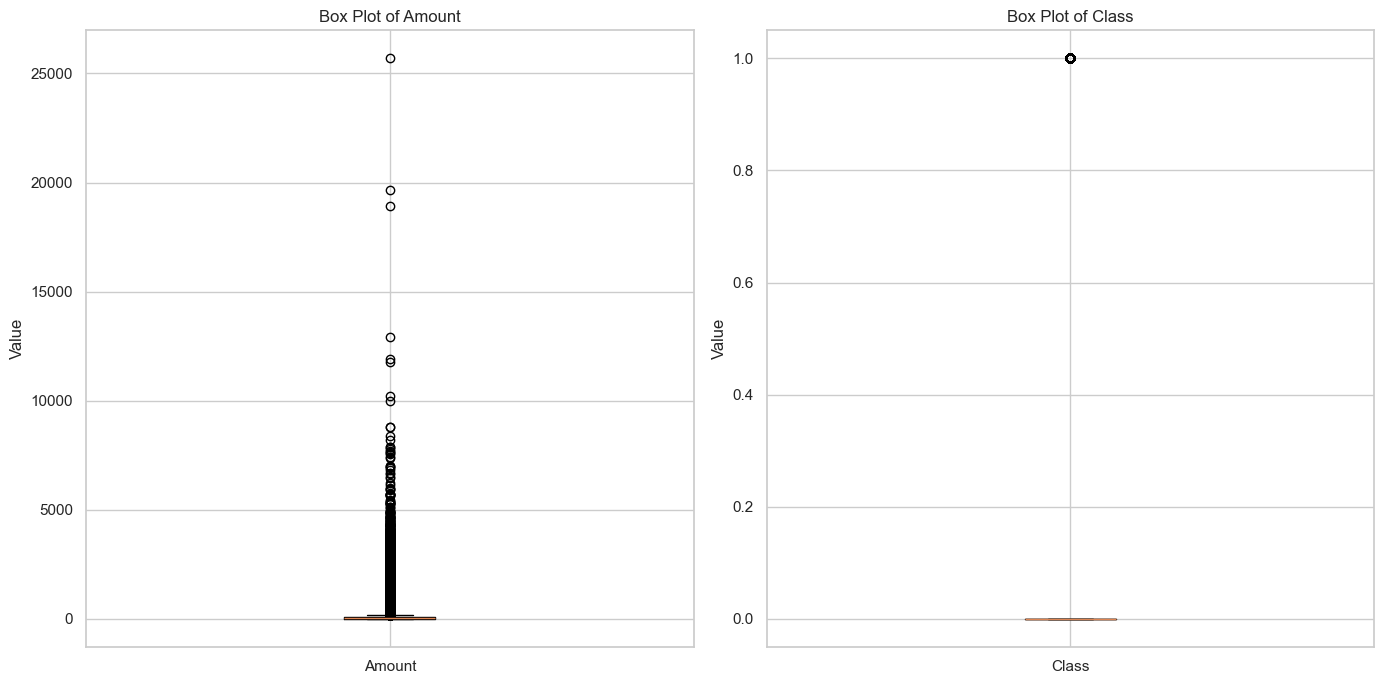

In [14]:
# Create subplots for side-by-side box plots
plt.figure(figsize=(14, 7))

# Box plot for Amount
plt.subplot(1, 2, 1)
plt.boxplot(data['Amount'])
plt.title('Box Plot of Amount')
plt.ylabel('Value')
plt.xticks([1], ['Amount'])

# Box plot for Class
plt.subplot(1, 2, 2)
plt.boxplot(data['Class'])
plt.title('Box Plot of Class')
plt.ylabel('Value')
plt.xticks([1], ['Class'])

# Display the plots
plt.tight_layout()
plt.show()

Analyze the ouliers effect of 'Amount' with respect to the 'class'

In [15]:
# Total number of records
total_records = len(data)

# Number of records with class value 1 (fraudulent transaction)
num_class1 = len(data[data['Class'] == 1])

# Calculate percentage of total with class value 1
percentage_class1 = (num_class1 / total_records) * 100

# Identify outliers in the 'Amount' column using IQR method
Q1 = data['Amount'].quantile(0.25)
Q3 = data['Amount'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_amount = data[(data['Amount'] < lower_bound) | (data['Amount'] > upper_bound)]
num_outliers_amount = len(outliers_amount)

# Number of outliers in 'Amount' with class value 1
num_outliers_class1 = len(outliers_amount[outliers_amount['Class'] == 1])

# Calculate percentages
percentage_outliers_class1 = (num_outliers_class1 / num_outliers_amount) * 100
percentage_fraudulent_outliers_total = (num_outliers_class1 / total_records) * 100

# Display the results
print(f"Percentage of total with 'class' value 1 (fraudulent transaction): {percentage_class1:.2f}%")
print(f"Number of outliers in 'Amount': {num_outliers_amount}")
print(f"Number of outliers in 'Amount' with 'class' value 1 (fraudulent transaction): {num_outliers_class1}")
print(f"Percentage of outliers in 'Amount' with 'class' value 1 (fraudulent transaction): {percentage_outliers_class1:.2f}%")
print(f"Percentage of fraudulent outliers in 'Amount' with respect to the total data: {percentage_fraudulent_outliers_total:.2f}%")

Percentage of total with 'class' value 1 (fraudulent transaction): 0.17%
Number of outliers in 'Amount': 31685
Number of outliers in 'Amount' with 'class' value 1 (fraudulent transaction): 87
Percentage of outliers in 'Amount' with 'class' value 1 (fraudulent transaction): 0.27%
Percentage of fraudulent outliers in 'Amount' with respect to the total data: 0.03%


4. Exploratory Data Analysis (EDA)

Univariate analysis

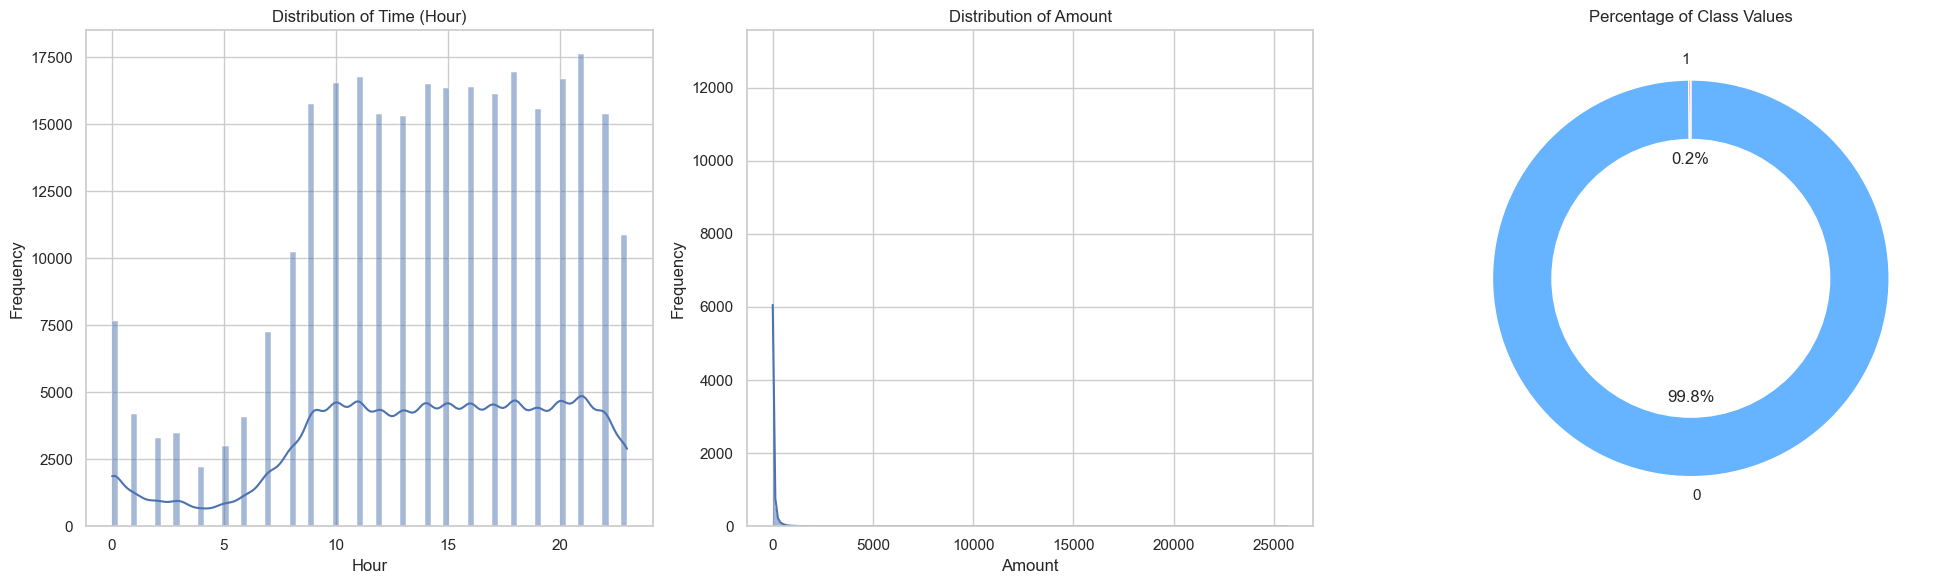

In [16]:
# Convert 'Time' to datetime (assuming 'Time' is in seconds since the first transaction)
data['Time'] = pd.to_datetime(data['Time'], unit='s', origin='unix')

# Create subplots for Time, Amount, and Class
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# Plot distribution of Time
sns.histplot(data['Time'].dt.hour, kde=True, ax=axes[0])
axes[0].set_title('Distribution of Time (Hour)')
axes[0].set_xlabel('Hour')
axes[0].set_ylabel('Frequency')

# Plot distribution of Amount
sns.histplot(data['Amount'], kde=True, ax=axes[1])
axes[1].set_title('Distribution of Amount')
axes[1].set_xlabel('Amount')
axes[1].set_ylabel('Frequency')
axes[1].set_ylim(0, 13566)  # Set y-axis range based on maximum frequency

# Plot distribution of Class
class_counts = data['Class'].value_counts()
class_percentages = class_counts / class_counts.sum() * 100
axes[2].pie(class_percentages, labels=class_percentages.index, autopct='%1.1f%%', startangle=90, counterclock=False, colors=['#66b3ff','#ff6666'])
centre_circle = plt.Circle((0,0),0.70,fc='white')
axes[2].add_artist(centre_circle)
axes[2].set_title('Percentage of Class Values')

plt.tight_layout()
plt.show()

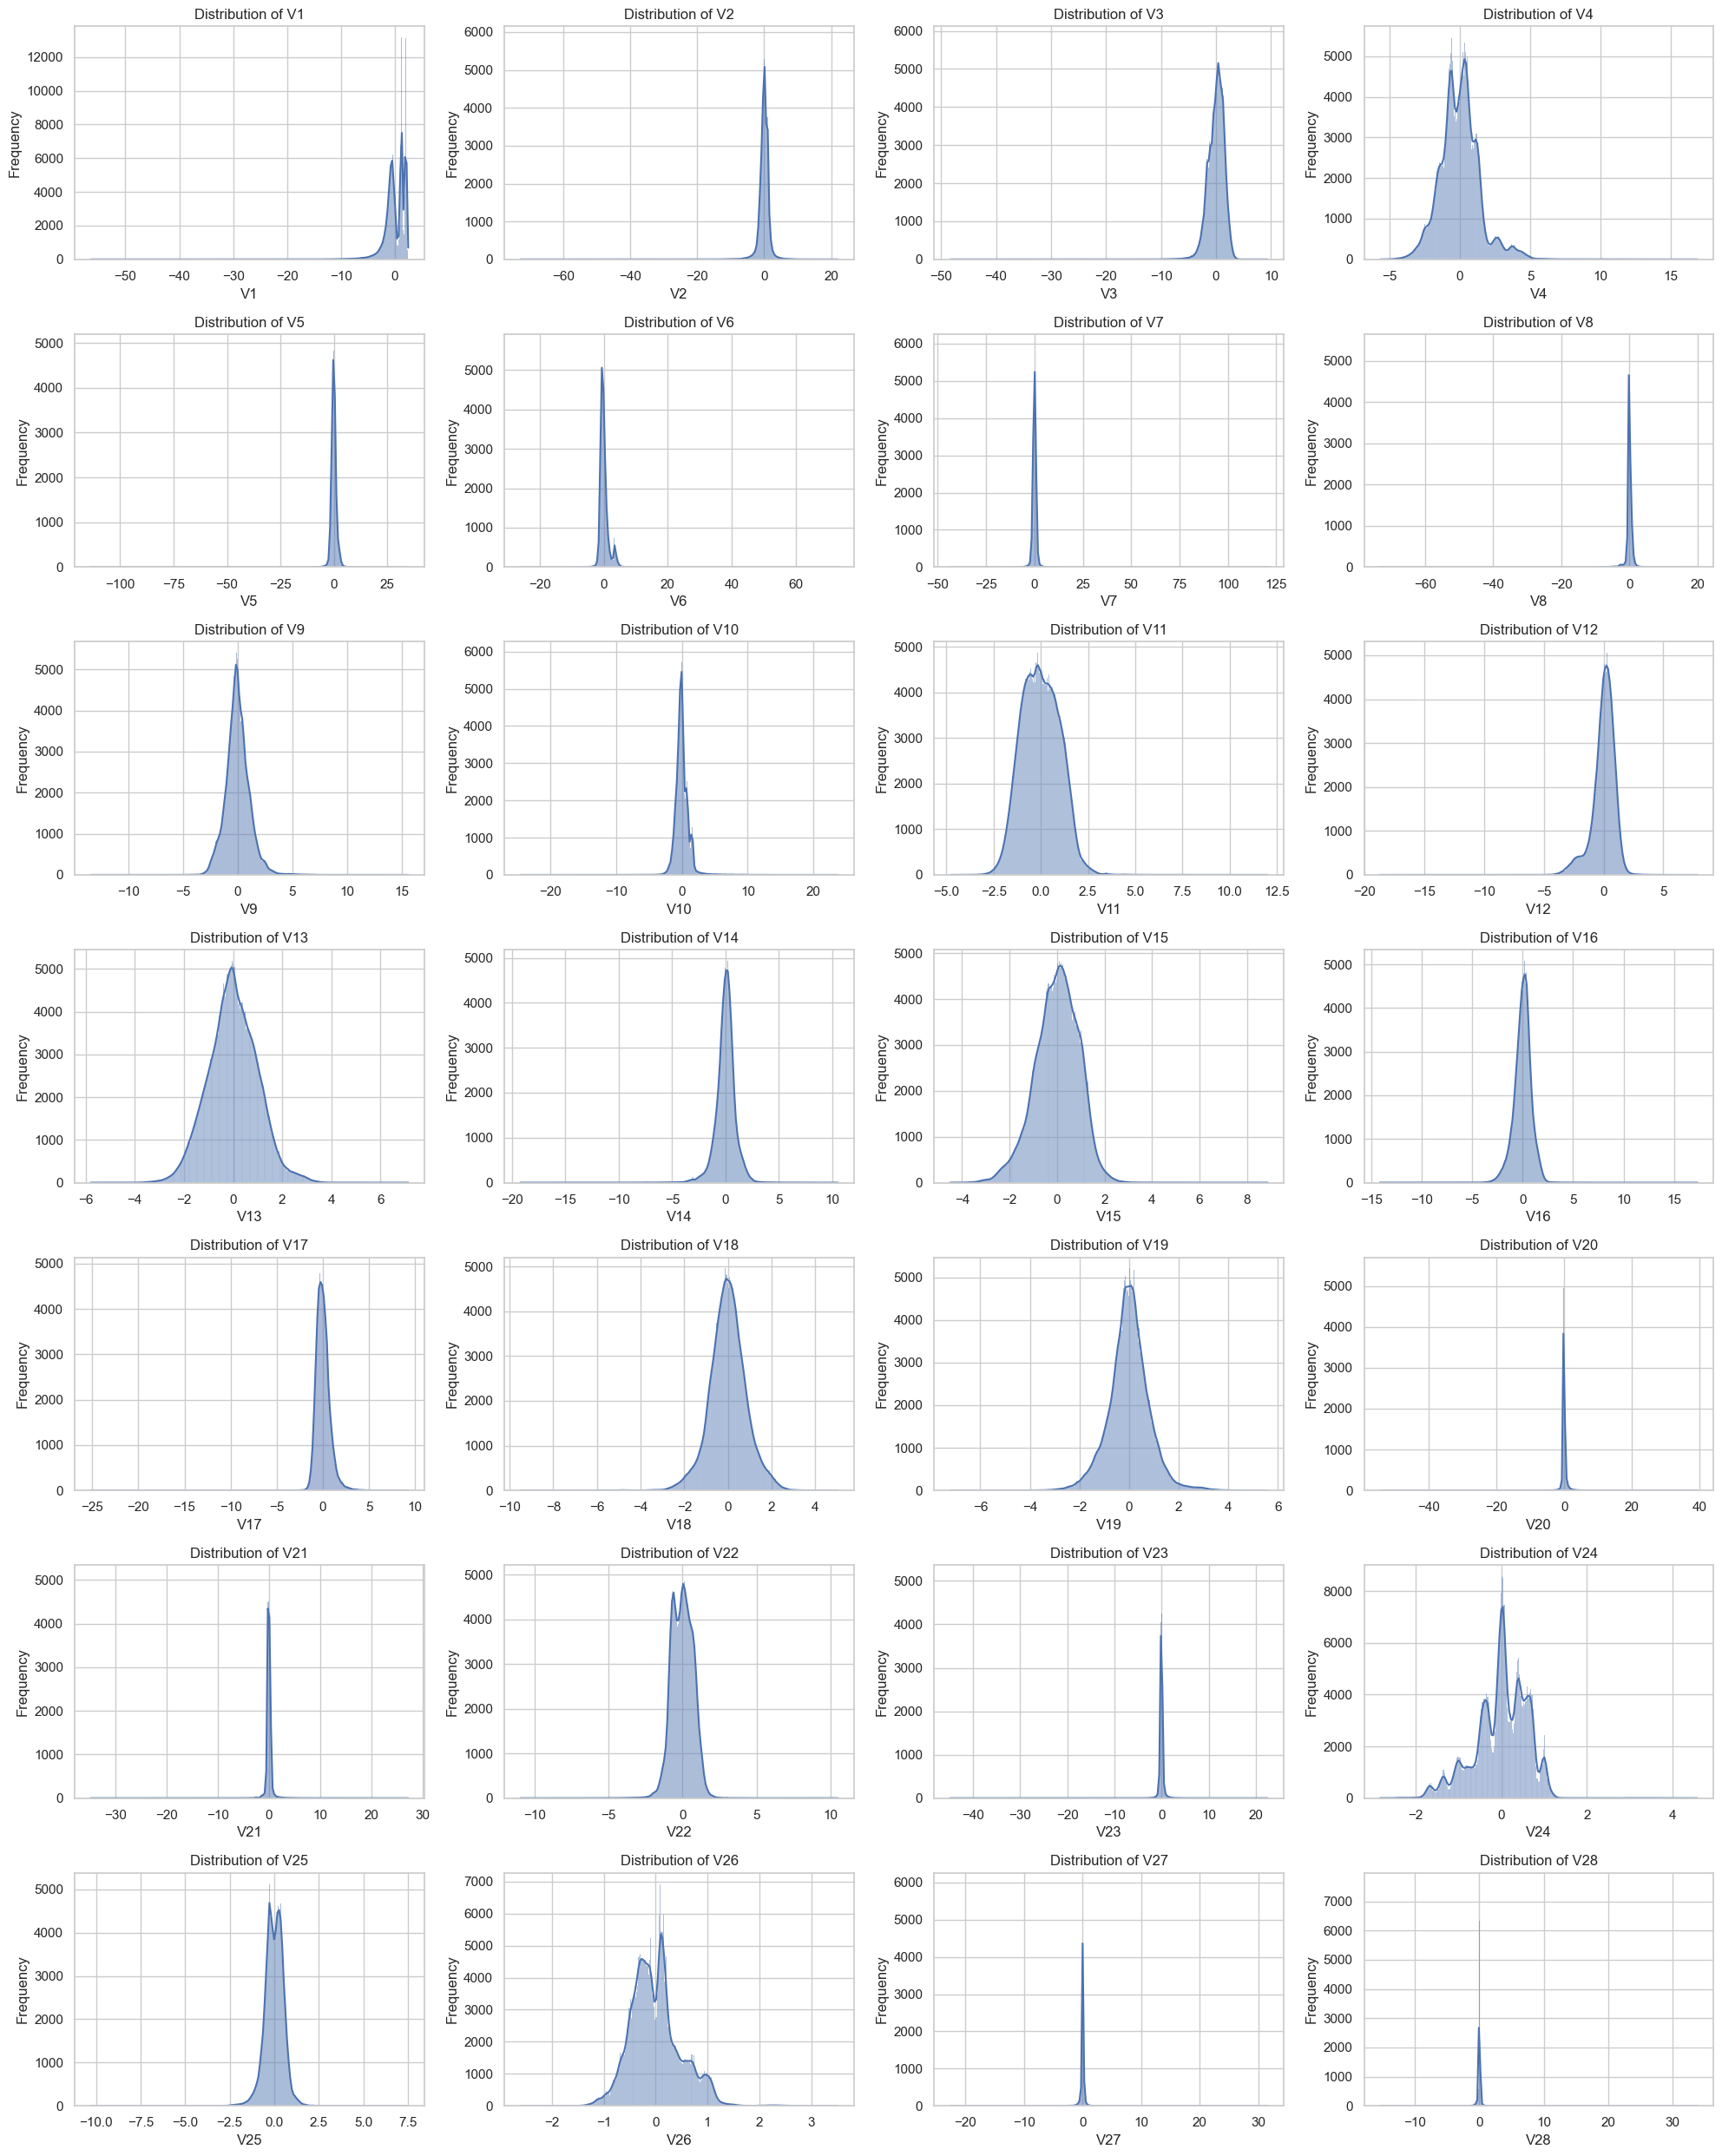

In [17]:
# Create subplots for remaining variables
fig, axes = plt.subplots(7, 4, figsize=(20, 25))

# List of columns for remaining variables
columns_to_analyze = [f'V{i}' for i in range(1, 29)]

# Plot each column
for i, col in enumerate(columns_to_analyze):
    row, col_pos = divmod(i, 4)
    sns.histplot(data[col], kde=True, ax=axes[row, col_pos])
    axes[row, col_pos].set_title(f'Distribution of {col}')
    axes[row, col_pos].set_xlabel(col)
    axes[row, col_pos].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

Bivariate analysis 

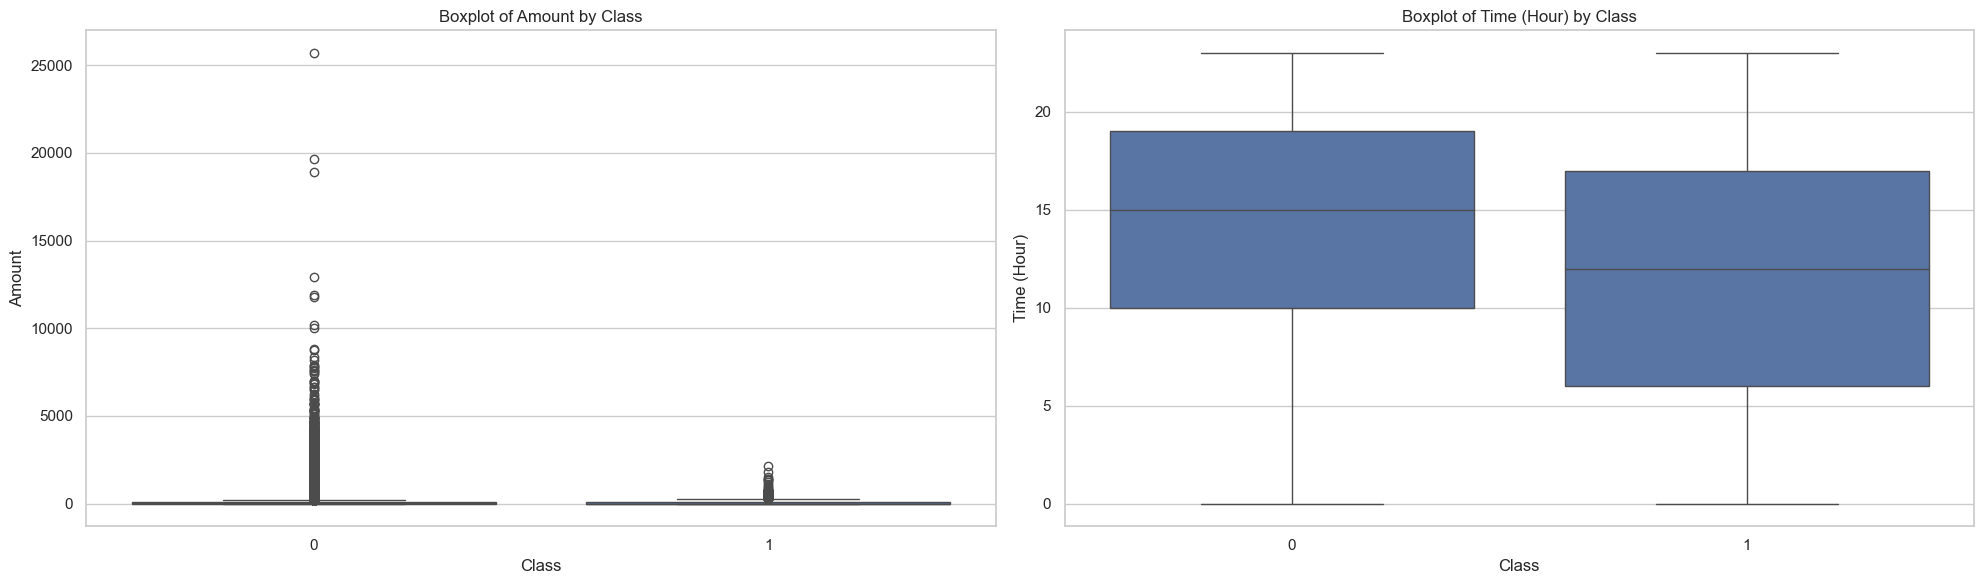

In [18]:
# Convert 'Time' to datetime (assuming 'Time' is in seconds since the first transaction)
data['Time'] = pd.to_datetime(data['Time'], unit='s', origin='unix')

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

# Boxplot for Amount and Class
sns.boxplot(x='Class', y='Amount', data=data, ax=axes[0])
axes[0].set_title('Boxplot of Amount by Class')
axes[0].set_xlabel('Class')
axes[0].set_ylabel('Amount')

# Boxplot for Time (Hour) and Class
sns.boxplot(x='Class', y=data['Time'].dt.hour, data=data, ax=axes[1])
axes[1].set_title('Boxplot of Time (Hour) by Class')
axes[1].set_xlabel('Class')
axes[1].set_ylabel('Time (Hour)')

plt.tight_layout()
plt.show()

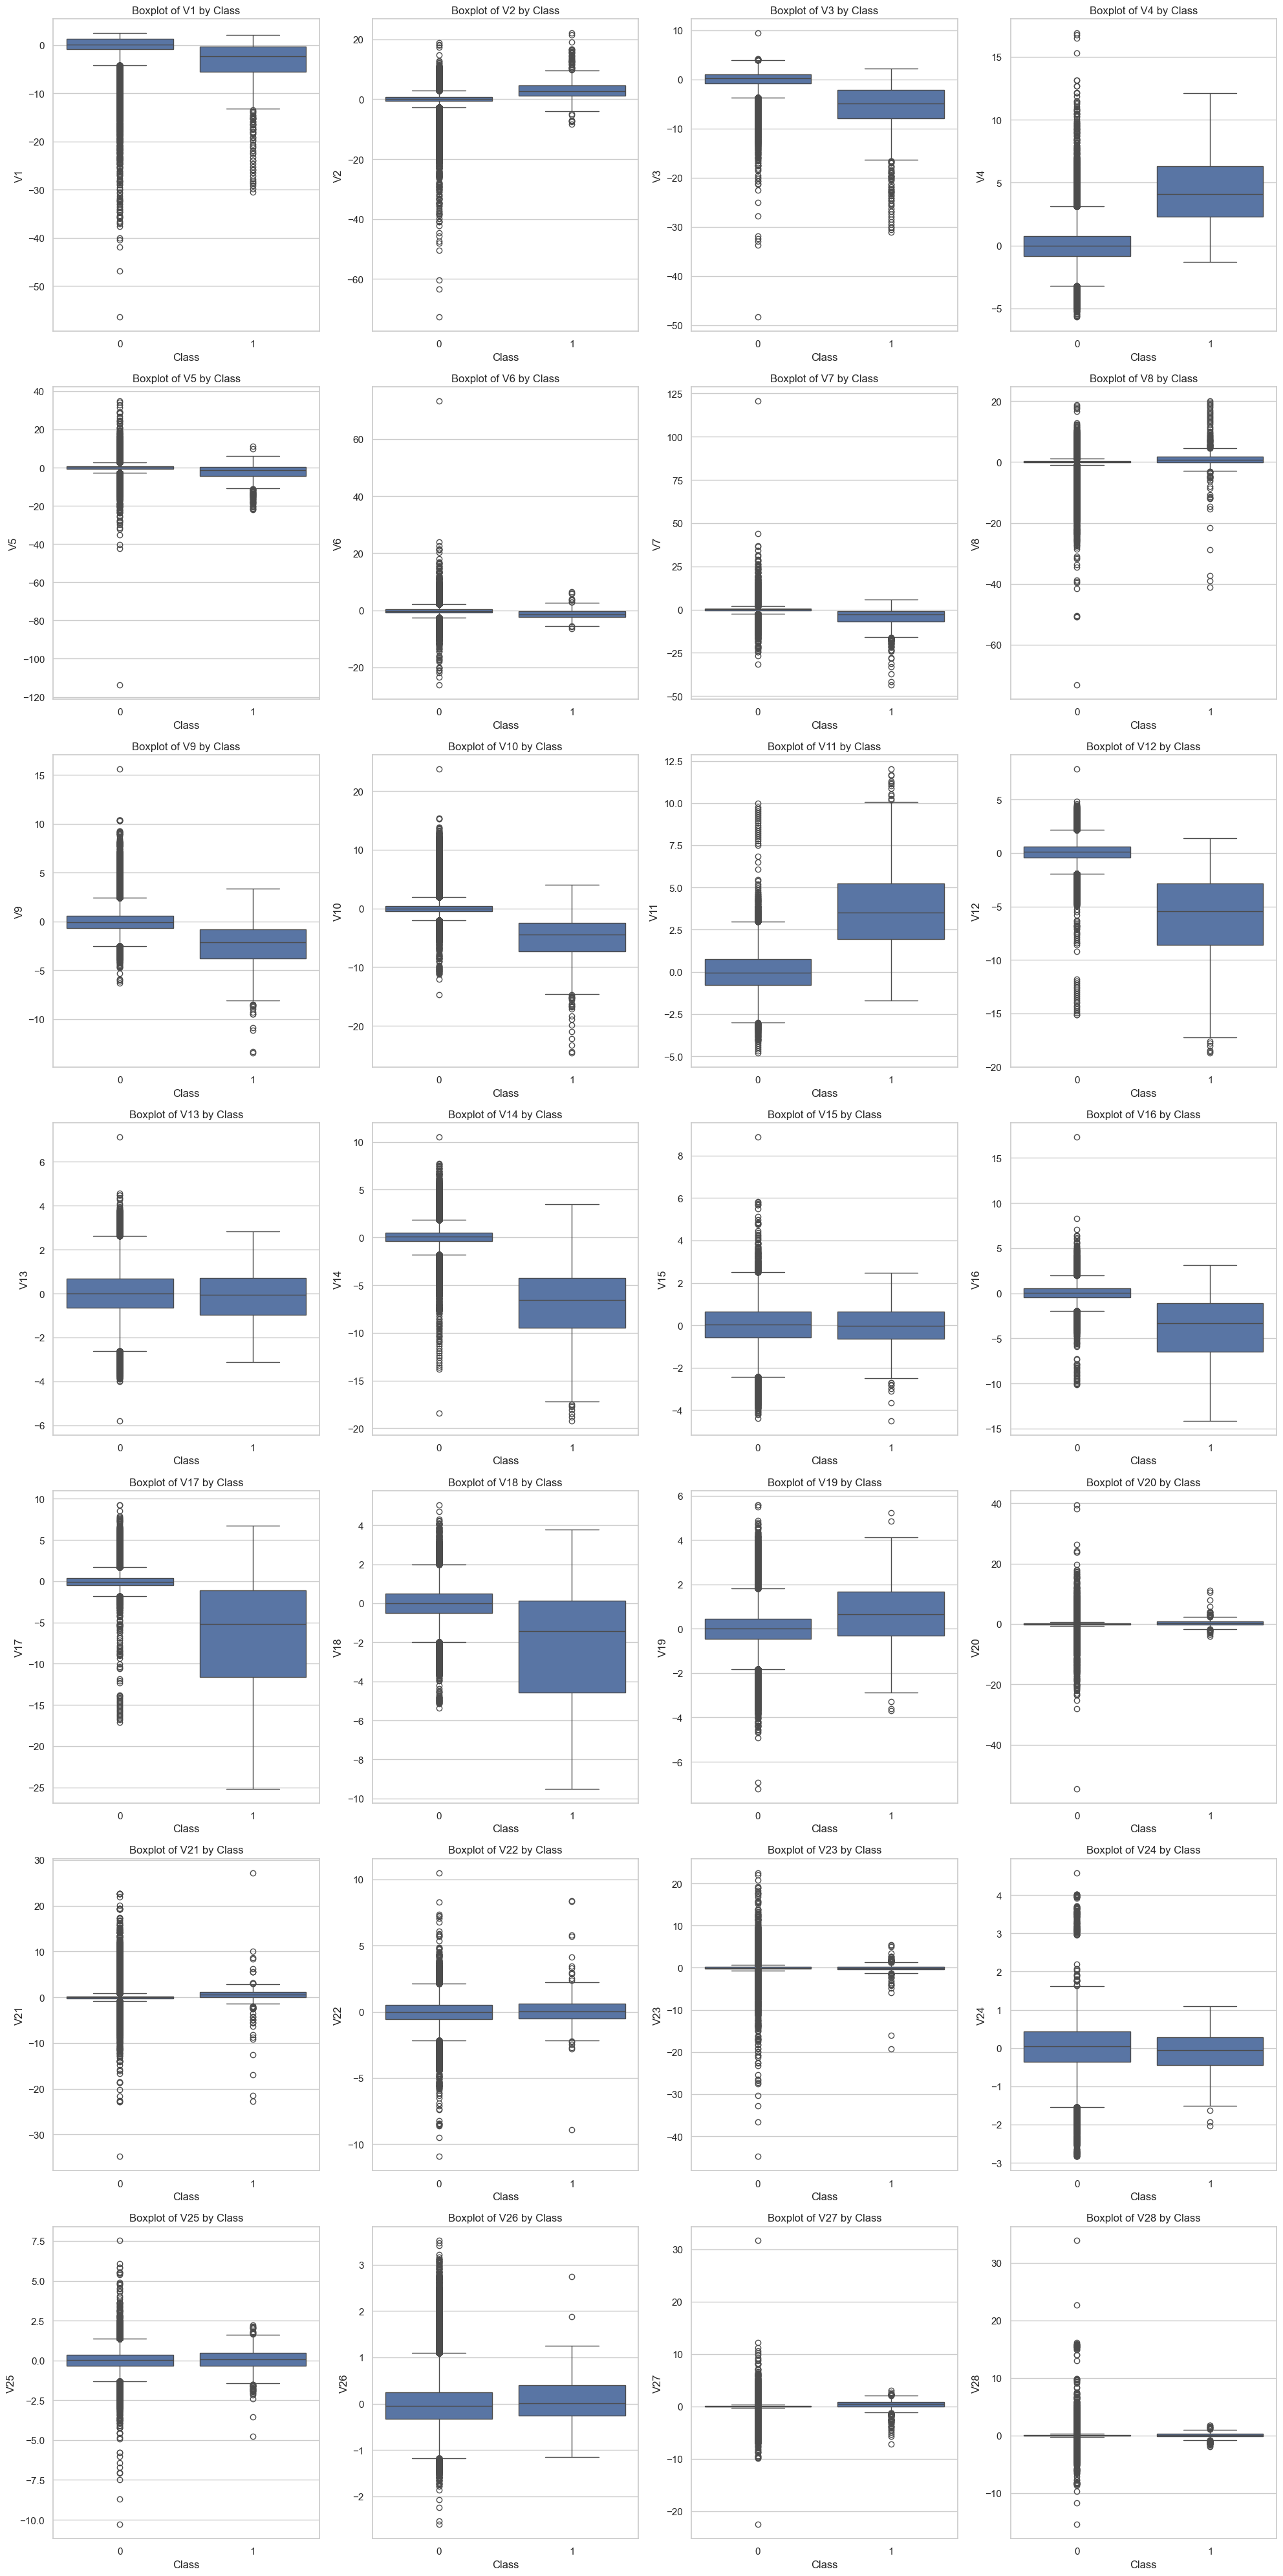

In [19]:
# Create subplots for bivariate analysis
fig, axes = plt.subplots(7, 4, figsize=(20, 40))

# List of columns to analyze
columns_to_analyze = [f'V{i}' for i in range(1, 29)]

# Plot each column
for i, col in enumerate(columns_to_analyze):
    row, col_pos = divmod(i, 4)
    sns.boxplot(x='Class', y=col, data=data, ax=axes[row, col_pos])
    axes[row, col_pos].set_title(f'Boxplot of {col} by Class')
    axes[row, col_pos].set_xlabel('Class')
    axes[row, col_pos].set_ylabel(col)

plt.tight_layout()
plt.show()

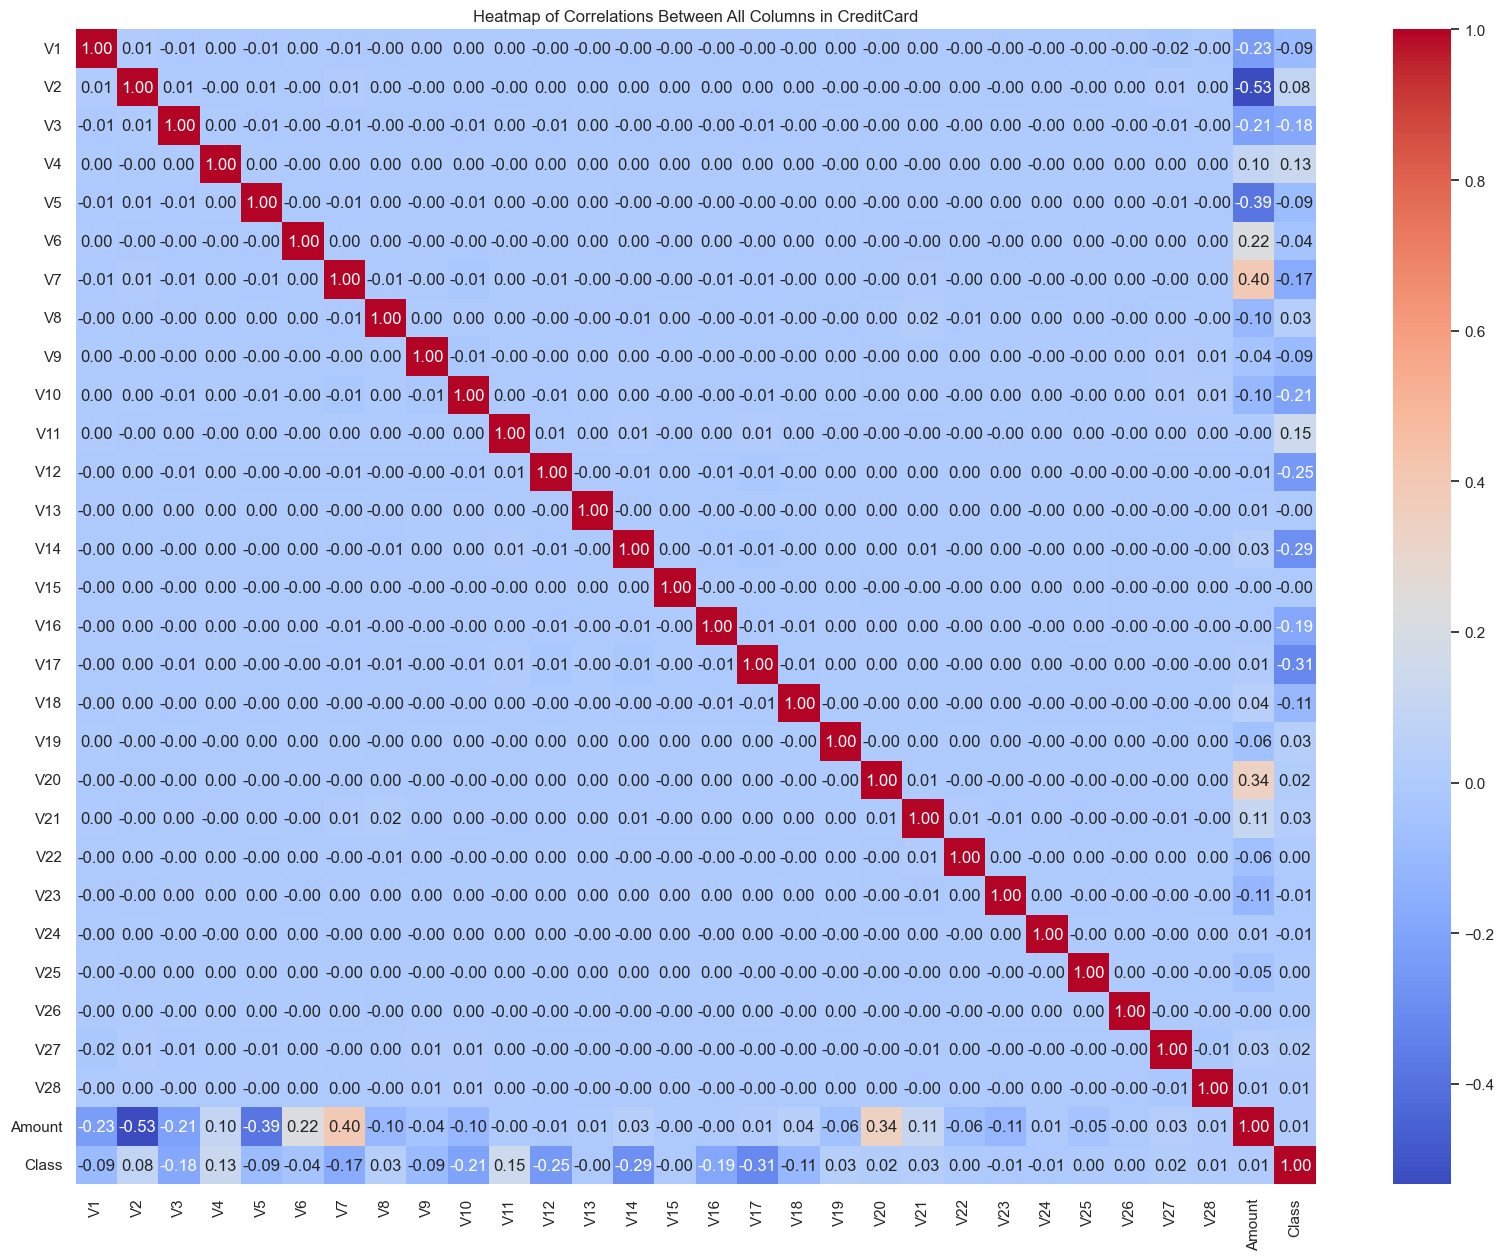

In [20]:
# Select only numeric columns for correlation matrix calculation
numeric_data = data.select_dtypes(include=[np.number])

# Compute the correlation matrix
corr_matrix = numeric_data.corr()

# Create a heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Heatmap of Correlations Between All Columns in CreditCard')
plt.show()

6. Feature Engineering

In [22]:
# Convert 'Time' to datetime to extract features, then revert back to float
data['Time_temp'] = pd.to_datetime(data['Time'], unit='s', origin='unix')

# Extract the hour from the 'Time_temp' column
data['Transaction_Hour'] = data['Time_temp'].dt.hour

# Extract the day of the week from the 'Time_temp' column
data['Transaction_DayOfWeek'] = data['Time_temp'].dt.dayofweek

# Drop the temporary 'Time_temp' column
data.drop(columns=['Time_temp'], inplace=True)

# Display the first few rows of the dataframe to show the new columns
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Transaction_Hour,Transaction_DayOfWeek
0,1970-01-01 00:00:00,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0,3
1,1970-01-01 00:00:00,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,0,3
2,1970-01-01 00:00:01,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,0,3
3,1970-01-01 00:00:01,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0,3
4,1970-01-01 00:00:02,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,0,3


7. Normalization and Scaling

In [23]:
# Check for missing values in the entire DataFrame
missing_values = data.isnull().sum()

# Display columns with missing values
print("Columns with missing values:")
print(missing_values[missing_values > 0])

Columns with missing values:
Series([], dtype: int64)


In [24]:
# Select only numeric columns for normalization and scaling, excluding 'Class', 'Transaction_Hour', and 'Transaction_DayOfWeek'
numeric_columns = data.select_dtypes(include=[np.number]).columns
numeric_columns = numeric_columns.drop(['Class', 'Transaction_Hour', 'Transaction_DayOfWeek'])

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the numeric columns
data[numeric_columns] = scaler.fit_transform(data[numeric_columns])

# Display the first few rows of the normalized and scaled dataframe
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Transaction_Hour,Transaction_DayOfWeek
0,1970-01-01 00:00:00,-0.701082,-0.041687,1.680101,0.976623,-0.247020,0.348012,0.193700,0.084434,0.333534,0.085688,-0.541662,-0.620391,-0.996550,-0.327050,1.603615,-0.539734,0.246646,0.028990,0.497011,0.326273,-0.024777,0.383483,-0.177444,0.110157,0.247059,-0.392622,0.333033,-0.065850,0.244200,0,0,3
1,1970-01-01 00:00:00,0.608792,0.164138,0.109279,0.318998,0.042258,-0.060980,-0.065656,0.072903,-0.231703,-0.153784,1.582896,1.071659,0.490735,-0.151252,0.693541,0.529653,-0.136468,-0.220781,-0.178907,-0.089963,-0.311372,-0.881454,0.162081,-0.561503,0.321175,0.260854,-0.027154,0.043219,-0.342584,0,0,3
2,1970-01-01 00:00:01,-0.700336,-0.811337,1.174270,0.270648,-0.366756,1.352655,0.643223,0.210788,-1.381169,0.194242,0.612829,0.067156,0.719981,-0.174539,2.562950,-3.309216,1.317260,-0.146738,-2.780497,0.681564,0.343094,1.065068,1.457772,-1.138484,-0.628161,-0.288861,-0.144325,-0.183824,1.158900,0,0,3
3,1970-01-01 00:00:01,-0.499064,-0.109972,1.187383,-0.608355,-0.008814,0.937245,0.192079,0.320843,-1.264664,-0.049713,-0.222524,0.179901,0.509483,-0.302638,-0.691296,-1.214165,-0.812176,2.345732,-1.515112,-0.270428,-0.149093,0.007299,-0.305465,-1.941446,1.242487,-0.460694,0.154039,0.185687,0.139886,0,0,3
4,1970-01-01 00:00:02,-0.597606,0.535539,1.025470,0.287092,-0.297036,0.072873,0.481517,-0.228725,0.747917,0.700958,-0.807922,0.541797,1.351427,-1.176125,0.190272,-0.518043,-0.281545,-0.047422,0.988165,0.530343,-0.012516,1.101780,-0.220709,0.232904,-0.394800,1.041677,0.550001,0.654234,-0.073813,0,0,3


8. Encode Categorical Features

In [25]:
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Define the categorical columns to encode
categorical_columns = ['Transaction_Hour', 'Transaction_DayOfWeek']

# Encode each categorical column using LabelEncoder
for column in categorical_columns:
    if column in data.columns:
        data[column] = label_encoder.fit_transform(data[column])

# Display the first few rows of the dataframe to show the encoded categorical features
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Transaction_Hour,Transaction_DayOfWeek
0,1970-01-01 00:00:00,-0.701082,-0.041687,1.680101,0.976623,-0.247020,0.348012,0.193700,0.084434,0.333534,0.085688,-0.541662,-0.620391,-0.996550,-0.327050,1.603615,-0.539734,0.246646,0.028990,0.497011,0.326273,-0.024777,0.383483,-0.177444,0.110157,0.247059,-0.392622,0.333033,-0.065850,0.244200,0,0,0
1,1970-01-01 00:00:00,0.608792,0.164138,0.109279,0.318998,0.042258,-0.060980,-0.065656,0.072903,-0.231703,-0.153784,1.582896,1.071659,0.490735,-0.151252,0.693541,0.529653,-0.136468,-0.220781,-0.178907,-0.089963,-0.311372,-0.881454,0.162081,-0.561503,0.321175,0.260854,-0.027154,0.043219,-0.342584,0,0,0
2,1970-01-01 00:00:01,-0.700336,-0.811337,1.174270,0.270648,-0.366756,1.352655,0.643223,0.210788,-1.381169,0.194242,0.612829,0.067156,0.719981,-0.174539,2.562950,-3.309216,1.317260,-0.146738,-2.780497,0.681564,0.343094,1.065068,1.457772,-1.138484,-0.628161,-0.288861,-0.144325,-0.183824,1.158900,0,0,0
3,1970-01-01 00:00:01,-0.499064,-0.109972,1.187383,-0.608355,-0.008814,0.937245,0.192079,0.320843,-1.264664,-0.049713,-0.222524,0.179901,0.509483,-0.302638,-0.691296,-1.214165,-0.812176,2.345732,-1.515112,-0.270428,-0.149093,0.007299,-0.305465,-1.941446,1.242487,-0.460694,0.154039,0.185687,0.139886,0,0,0
4,1970-01-01 00:00:02,-0.597606,0.535539,1.025470,0.287092,-0.297036,0.072873,0.481517,-0.228725,0.747917,0.700958,-0.807922,0.541797,1.351427,-1.176125,0.190272,-0.518043,-0.281545,-0.047422,0.988165,0.530343,-0.012516,1.101780,-0.220709,0.232904,-0.394800,1.041677,0.550001,0.654234,-0.073813,0,0,0


9. Save Data

In [26]:
# Save the creditcard processed data to the specified path
data.to_csv('../../src/data/creditcard_processed_data.csv', index=False)

# Display a message indicating the data has been saved
print("Creditcard processed data has been saved to '../../src/data/creditcard_processed_data.csv'.")

Creditcard processed data has been saved to '../../src/data/creditcard_processed_data.csv'.
